# **NYC Stop-and-Frisk**

**Importing data and libraries**

In [1]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
files = sorted(glob("20??.csv"))
li = []

for file in files:
    li.append(pd.read_csv(file, low_memory = False))
    
df = pd.concat(li, axis = 0)

df

,year,pct,ser_num,datestop,timestop,inout,trhsloc,perobs,crimsusp,perstop,...,crossst,aptnum,city,state,zip,sector,beat,post,xcoord,ycoord
0,2003,70,5,1012003,03:00,O,,1,ROBBERY,2,...,,,,,,,,,,
1,2003,70,3,1012003,03:00,O,,1,ROBBERY,3,...,,,,,,,,,,
2,2003,68,1406,1012003,03:00,I,,1,CPW,5,...,,,,,,,,,,
3,2003,48,4,1012003,16:00,I,,1,BURGLARY,10,...,,,,,,,,,,
4,2003,48,999991,1022003,03:35,O,,30,ROBBERY,10,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191846,2013,45,1160,12312013,2320,O,H,2,FELONY,5,...,RANDALL AVENUE,,BRONX,,,D,,,1032876,239871
191847,2013,9,2338,12312013,2337,O,P,5,FELONY,3,...,4 AVENUE,,MANHATTAN,,,D,10,66,987234,206419
191848,2013,49,1645,12312013,2350,O,P,1,FELONY,5,...,BRADY AVENUE,,BRONX,,,D,5,,1022168,250463
191849,2013,49,1647,12312013,2350,O,P,1,FELONY,5,...,BRADY AVENUE,,BRONX,,,D,5,,1022168,250463


In [3]:
information = ["YEAR OF STOP (CCYY)", "PRECINCT OF STOP (FROM 1 TO 123)", "WAS AN ARREST MADE ?", 
               "WAS A SUMMONS ISSUED ?", "WAS A PISTOL FOUND ON SUSPECT ?", "WAS A RIFLE FOUND ON SUSPECT ?", 
               "WAS AN ASSAULT WEAPON FOUND ON SUSPECT ?", "WAS A KNIFE OR CUTTING INSTRUMENT FOUND ON SUSPECT ?",
               "WAS A MACHINE GUN FOUND ON SUSPECT ?","WAS ANOTHER TYPE OF WEAPON FOUND ON SUSPECT", 
               "PHYSICAL FORCE USED BY OFFICER - HANDS", "PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAINST WALL",
               "PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GROUND", "PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN",
               "PHYSICAL FORCE USED BY OFFICER - WEAPON POINTED", "PHYSICAL FORCE USED BY OFFICER - BATON",
               "PHYSICAL FORCE USED BY OFFICER - HANDCUFFS", "PHYSICAL FORCE USED BY OFFICER - PEPPER SPRAY",
               "PHYSICAL FORCE USED BY OFFICER - OTHER", "SUSPECT'S RACE"]

In [4]:
legend = pd.read_excel("legend.xlsx")
cols = []
for info in information:
    index = legend[legend["Label"] == info].index[0]
    cols.append(legend.iloc[index]["Variable"])

df = df[cols]
df

,year,pct,arstmade,sumissue,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,race
0,2003,70,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,B
1,2003,70,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,B
2,2003,68,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Q
3,2003,48,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Q
4,2003,48,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191846,2013,45,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,B
191847,2013,9,Y,N,N,N,N,Y,N,N,Y,N,Y,N,N,N,N,N,N,P
191848,2013,49,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A
191849,2013,49,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A


**Data Preprocessing**

In [5]:
boro = pd.read_csv("precincts.csv")
df = df.merge(boro, left_on = "pct", right_on = "Precinct")
df.drop("Precinct", axis = 1, inplace = True)
df.rename(columns = {"Borough": "boro"}, inplace = True)
df

,year,pct,arstmade,sumissue,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,...,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,race,boro
0,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,B,Brooklyn
1,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,B,Brooklyn
2,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,B,Brooklyn
3,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,B,Brooklyn
4,2003,70,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,Q,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982997,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,B,Staten Island
4982998,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,B,Staten Island
4982999,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,Q,Staten Island
4983000,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,Q,Staten Island


In [6]:
physical_force = np.where(((df["pf_hands"] == "Y") |
                          (df["pf_wall"] == "Y") |
                          (df["pf_grnd"] == "Y") |
                          (df["pf_drwep"] == "Y") |
                          (df["pf_ptwep"] == "Y") |
                          (df["pf_baton"] == "Y") |
                          (df["pf_hcuff"] == "Y") |
                          (df["pf_pepsp"] == "Y") |
                          (df["pf_other"] == "Y")), 1, 0)
df["physical_force"] = physical_force
df

,year,pct,arstmade,sumissue,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,...,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,race,boro,physical_force
0,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,B,Brooklyn,0
1,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,B,Brooklyn,0
2,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,B,Brooklyn,0
3,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,B,Brooklyn,0
4,2003,70,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,Q,Brooklyn,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982997,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,B,Staten Island,0
4982998,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,B,Staten Island,0
4982999,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,Q,Staten Island,0
4983000,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,Q,Staten Island,0


In [7]:
weapons = np.where(((df["pistol"] == "Y") |
                    (df["riflshot"] == "Y") |
                    (df["asltweap"] == "Y") |
                    (df["knifcuti"] == "Y") |
                    (df["machgun"] == "Y") |
                    (df["othrweap"] == "Y")), 1, 0)
df["weapons"] = weapons
df

,year,pct,arstmade,sumissue,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,...,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,race,boro,physical_force,weapons
0,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,B,Brooklyn,0,0
1,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,B,Brooklyn,0,0
2,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,B,Brooklyn,0,0
3,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,B,Brooklyn,0,0
4,2003,70,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Q,Brooklyn,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982997,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,B,Staten Island,0,0
4982998,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,B,Staten Island,0,0
4982999,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Q,Staten Island,0,0
4983000,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Q,Staten Island,0,0


In [8]:
arrest = np.where(((df["arstmade"] == "Y") |
                    (df["sumissue"] == "Y")), 1, 0)
df["arrest"] = arrest
df

,year,pct,arstmade,sumissue,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,...,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,race,boro,physical_force,weapons,arrest
0,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,B,Brooklyn,0,0,0
1,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,B,Brooklyn,0,0,0
2,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,B,Brooklyn,0,0,0
3,2003,70,N,N,N,N,N,N,N,N,...,N,N,N,N,N,B,Brooklyn,0,0,0
4,2003,70,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,Q,Brooklyn,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982997,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,B,Staten Island,0,0,0
4982998,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,B,Staten Island,0,0,0
4982999,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,Q,Staten Island,0,0,0
4983000,2013,121,N,N,N,N,N,N,N,N,...,N,N,N,N,N,Q,Staten Island,0,0,0


In [9]:
df.drop(["pct", "pf_hands", 
         "pf_wall", "pf_grnd", 
         "pf_drwep", "pf_ptwep", 
         "pf_baton", "pf_hcuff", 
         "pf_pepsp", "pf_other", 
         "pistol", "riflshot", 
         "asltweap", "knifcuti", 
         "machgun", "othrweap", 
         "arstmade", "sumissue"], axis = 1, inplace = True)
df

,year,race,boro,physical_force,weapons,arrest
0,2003,B,Brooklyn,0,0,0
1,2003,B,Brooklyn,0,0,0
2,2003,B,Brooklyn,0,0,0
3,2003,B,Brooklyn,0,0,0
4,2003,Q,Brooklyn,0,0,1
...,...,...,...,...,...,...
4982997,2013,B,Staten Island,0,0,0
4982998,2013,B,Staten Island,0,0,0
4982999,2013,Q,Staten Island,0,0,0
4983000,2013,Q,Staten Island,0,0,0


In [10]:
df.replace({"race": {"B": "Black", "P": "Black", 
                     "W": "White", "Q": "White",
                     "A": "Asian",
                     "I": "Other", "Z": "Other", "U": "Other", "X": "Other", "": "Other", " ": "Other"}}, inplace = True)
df.rename(columns = {"race": "ethnicity"}, inplace = True)
df

,year,ethnicity,boro,physical_force,weapons,arrest
0,2003,Black,Brooklyn,0,0,0
1,2003,Black,Brooklyn,0,0,0
2,2003,Black,Brooklyn,0,0,0
3,2003,Black,Brooklyn,0,0,0
4,2003,White,Brooklyn,0,0,1
...,...,...,...,...,...,...
4982997,2013,Black,Staten Island,0,0,0
4982998,2013,Black,Staten Island,0,0,0
4982999,2013,White,Staten Island,0,0,0
4983000,2013,White,Staten Island,0,0,0


**Data Visualization**

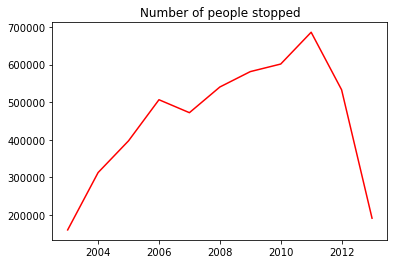

In [11]:
fig = plt.figure()
x = df["year"].unique().tolist()
y = df.groupby("year")["arrest"].count().tolist()

plt.title("Number of people stopped")
plt.plot(x, y, color = "red")

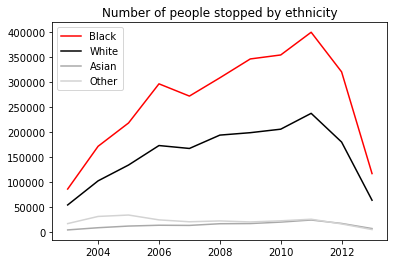

In [12]:
fig = plt.figure()
x = df["year"].unique().tolist()

y_black = df[df["ethnicity"] == "Black"].groupby("year")["arrest"].count().tolist()
y_white = df[df["ethnicity"] == "White"].groupby("year")["arrest"].count().tolist()
y_asian = df[df["ethnicity"] == "Asian"].groupby("year")["arrest"].count().tolist()
y_other = df[df["ethnicity"] == "Other"].groupby("year")["arrest"].count().tolist()

plt.title("Number of people stopped by ethnicity")
plt.plot(x, y_black, color = "red", label = "Black")
plt.plot(x, y_white, color = "black", label = "White")
plt.plot(x, y_asian, color = "darkgray", label = "Asian")
plt.plot(x, y_other, color = "lightgray", label = "Other")
plt.legend(loc = "upper left")

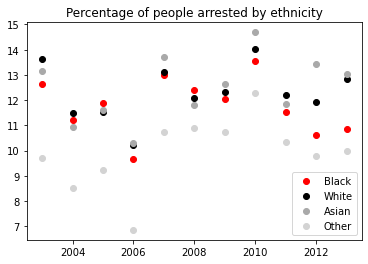

In [13]:
fig = plt.figure()
x = df["year"].unique().tolist()

y_black_arrested = ((df[df["ethnicity"] == "Black"].groupby("year")["arrest"].sum() / df[df["ethnicity"] == "Black"].groupby("year").count()["arrest"]) * 100).tolist()
y_white_arrested = ((df[df["ethnicity"] == "White"].groupby("year")["arrest"].sum() / df[df["ethnicity"] == "White"].groupby("year").count()["arrest"]) * 100).tolist()
y_asian_arrested = ((df[df["ethnicity"] == "Asian"].groupby("year")["arrest"].sum() / df[df["ethnicity"] == "Asian"].groupby("year").count()["arrest"]) * 100).tolist()
y_other_arrested = ((df[df["ethnicity"] == "Other"].groupby("year")["arrest"].sum() / df[df["ethnicity"] == "Other"].groupby("year").count()["arrest"]) * 100).tolist()


plt.title("Percentage of people arrested by ethnicity")
plt.scatter(x, y_black_arrested, color = "red", label = "Black")
plt.scatter(x, y_white_arrested, color = "black", label = "White")
plt.scatter(x, y_asian_arrested, color = "darkgray", label = "Asian")
plt.scatter(x, y_other_arrested, color = "lightgray", label = "Other")
plt.legend(loc = "lower right")

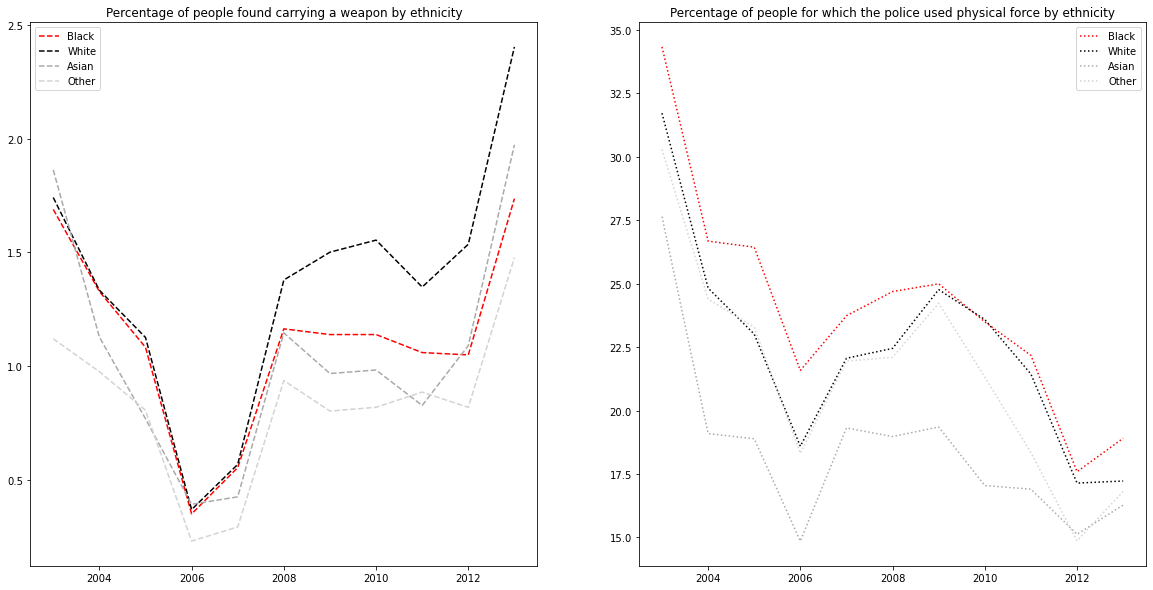

In [14]:
fig = plt.figure(figsize = (20,10))
x = df["year"].unique().tolist()

y_black_weapon = ((df[df["ethnicity"] == "Black"].groupby("year")["weapons"].sum() / df[df["ethnicity"] == "Black"].groupby("year").count()["weapons"]) * 100).tolist()
y_white_weapon = ((df[df["ethnicity"] == "White"].groupby("year")["weapons"].sum() / df[df["ethnicity"] == "White"].groupby("year").count()["weapons"]) * 100).tolist()
y_asian_weapon = ((df[df["ethnicity"] == "Asian"].groupby("year")["weapons"].sum() / df[df["ethnicity"] == "Asian"].groupby("year").count()["weapons"]) * 100).tolist()
y_other_weapon = ((df[df["ethnicity"] == "Other"].groupby("year")["weapons"].sum() / df[df["ethnicity"] == "Other"].groupby("year").count()["weapons"]) * 100).tolist()

y_black_physical_force = ((df[df["ethnicity"] == "Black"].groupby("year")["physical_force"].sum() / df[df["ethnicity"] == "Black"].groupby("year").count()["physical_force"]) * 100).tolist()
y_white_physical_force = ((df[df["ethnicity"] == "White"].groupby("year")["physical_force"].sum() / df[df["ethnicity"] == "White"].groupby("year").count()["physical_force"]) * 100).tolist()
y_asian_physical_force = ((df[df["ethnicity"] == "Asian"].groupby("year")["physical_force"].sum() / df[df["ethnicity"] == "Asian"].groupby("year").count()["physical_force"]) * 100).tolist()
y_other_physical_force = ((df[df["ethnicity"] == "Other"].groupby("year")["physical_force"].sum() / df[df["ethnicity"] == "Other"].groupby("year").count()["physical_force"]) * 100).tolist()


ax = plt.subplot(1,2,1)

ax.set_title("Percentage of people found carrying a weapon by ethnicity")
ax.plot(x, y_black_weapon, linestyle = "dashed", color = "red", label = "Black")
ax.plot(x, y_white_weapon, linestyle = "dashed", color = "black", label = "White")
ax.plot(x, y_asian_weapon, linestyle = "dashed", color = "darkgray", label = "Asian")
ax.plot(x, y_other_weapon, linestyle = "dashed", color = "lightgray", label = "Other")
ax.legend(loc = "upper left")

ax = plt.subplot(1,2,2)

ax.set_title("Percentage of people for which the police used physical force by ethnicity")
ax.plot(x, y_black_physical_force, linestyle = "dotted", color = "red", label = "Black")
ax.plot(x, y_white_physical_force, linestyle = "dotted", color = "black", label = "White")
ax.plot(x, y_asian_physical_force, linestyle = "dotted", color = "darkgray", label = "Asian")
ax.plot(x, y_other_physical_force, linestyle = "dotted", color = "lightgray", label = "Other")
ax.legend(loc = "upper right")

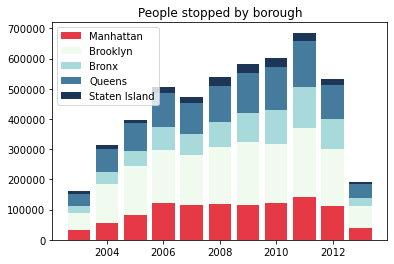

In [15]:
fig = plt.figure()
x = df["year"].unique().tolist()

y_manhattan = df[df["boro"] == "Manhattan"].groupby("year").count()['boro'].tolist()
y_brooklyn = df[df["boro"] == "Brooklyn"].groupby("year").count()['boro'].tolist()
y_bronx = df[df["boro"] == "Bronx"].groupby("year").count()['boro'].tolist()
y_queens = df[df["boro"] == "Queens"].groupby("year").count()['boro'].tolist()
y_staten_island = df[df["boro"] == "Staten Island"].groupby("year").count()['boro'].tolist()

plt.title("People stopped by borough")
plt.bar(x, y_manhattan, color = "#e63946", label = "Manhattan")
plt.bar(x, y_brooklyn, color = "#f1faee", label = "Brooklyn", bottom = [sum(x) for x in zip(y_manhattan)])
plt.bar(x, y_bronx, color = "#a8dadc", label = "Bronx", bottom = [sum(x) for x in zip(y_manhattan, y_brooklyn)])
plt.bar(x, y_queens, color = "#457b9d", label = "Queens", bottom = [sum(x) for x in zip(y_manhattan, y_brooklyn, y_bronx)])
plt.bar(x, y_staten_island, color = "#1d3557", label = "Staten Island", bottom = [sum(x) for x in zip(y_manhattan, y_brooklyn, y_bronx, y_queens)])

plt.legend(loc = "upper left")